In [13]:
#  Retrieve all tags starting from ‘@’ in the entire dataset and save in a file called  “References.txt” 

import nltk
import re
from nltk.tokenize import word_tokenize as wt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from nltk.probability import FreqDist
from itertools import cycle

f = pd.read_csv("M3Tweets.csv")
list_of_texts = f["text"].values.tolist()
Rf = open("References.txt", "w", encoding="utf-8") #see encoding for text file utf-8
for l in list_of_texts:
    #print(l)
    tokens = wt(l)
    for id, t in enumerate(tokens):
        x = re.findall("@", t)
        if x!=[]:
            nextelem = tokens[(id + 1) % len(tokens)]
            item = ("@" + nextelem + "\n")
            Rf.write(str(item))

In [1]:
# 2 
# Extract all noun phrases from their dataset and save them in different lines in a file named 
# “Noun Phrases for <airline_sentiment> Review .txt” (You can choose your own grammar for noun phrase). 
# Here <airline_sentiment> will have 3 different values: positive, negative and neutral so 3 files will be created. 

import nltk
import re
from nltk.tokenize import word_tokenize as wt
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from nltk.probability import FreqDist
import pandas as pd

def ChunkingVer3(doc):
    tokens = wt(doc)
    pos = nltk.pos_tag(tokens)
    #print(pos)
    grammar_pn = r"dn: {<NN|NNS|NNP|NNPS><VB|VBD|VBG|VBN|VBP|VBZ>}"
    #r"dv: {<VB|VBD|VBG|VBN|VBP|VBZ><JJ|JJR|JJS>}"
    chunk_parser = nltk.RegexpParser(grammar_pn)
    chunk_result = chunk_parser.parse(pos)
    #print(chunk_result)
    for entity in chunk_result:
        if hasattr(entity, "label"):
            if(entity.label() == "dn"):
                for id, e in enumerate(entity):
                    nextitem = entity[(id + 1) % len(entity)]
                    item = str(e[0]) + " " + str(nextitem[0]) #This will change with respect to defined grammar above
                    return(item)
                    break;
    
                    
f = pd.read_csv("M3Tweets.csv")
list_of_texts = f["text"].values.tolist()
list_of_sentiments = f["airline_sentiment"].values.tolist()
fp = open("Noun Phrases for positive Review.txt",'w', encoding="utf-8")
fn = open("Noun Phrases for negative Review.txt",'w', encoding="utf-8")
fu = open("Noun Phrases for neutral Review.txt",'w', encoding="utf-8")
counter = -1
for t in list_of_texts:
    counter = counter + 1
    freq = str(ChunkingVer3(t)) # whenever you return a value from a function change it to str or int as required.
    if (freq != "None"):
        #print(freq, end = " ")
        #print(list_of_sentiments[counter])
        if(list_of_sentiments[counter] == "positive"):
            fp.write(freq + "\n")
        if(list_of_sentiments[counter] == "negative"):
            fn.write(freq + "\n")
        if(list_of_sentiments[counter] == "neutral"):
            fu.write(freq + "\n")
#doc.close()

In [1]:
# 3
# Extract all verb phrases from their dataset and save them in different lines in a file named 
# “Verb Phrases for <airline_sentiment> Review .txt” (You can choose your own grammar for noun phrase). 
# Here <airline_sentiment> will have 3 different values: positive, negative and neutral so 3 files will be created. 

import nltk
import re
from nltk.tokenize import word_tokenize as wt
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from nltk.probability import FreqDist
import pandas as pd

def ChunkingVer3(doc):
    tokens = wt(doc)
    pos = nltk.pos_tag(tokens)
    #print(pos)
    grammar_pn = r"dv: {<VB|VBD|VBG|VBN|VBP|VBZ><JJ|JJR|JJS>}"
    #r"dn: {<NN|NNS|NNP|NNPS><VB|VBD|VBG|VBN|VBP|VBZ>}"
    chunk_parser = nltk.RegexpParser(grammar_pn)
    chunk_result = chunk_parser.parse(pos)
    #print(chunk_result)
    for entity in chunk_result:
        print(entity)
        if hasattr(entity, "label"):
            if(entity.label() == "dv"):
                for id, e in enumerate(entity):
                    nextitem = entity[(id + 1) % len(entity)]
                    item = str(e[0]) + " " + str(nextitem[0]) #This will change with respect to defined grammar above
                    return(item)
                    break;
                      
f = pd.read_csv("M3Tweets.csv")
list_of_texts = f["text"].values.tolist()
list_of_sentiments = f["airline_sentiment"].values.tolist()
counter = -1
'''for t in list_of_texts:
    counter = counter + 1
    freq = str(ChunkingVer3(t))
    print(freq)
    print(list_of_sentiments[counter])'''
fp = open("Verb Phrases for positive Review.txt",'w', encoding="utf-8")
fn = open("Verb Phrases for negative Review.txt",'w', encoding="utf-8")
fu = open("Verb Phrases for neutral Review.txt",'w', encoding="utf-8")
counter = -1
for t in list_of_texts:
    counter = counter + 1
    freq = str(ChunkingVer3(t)) # whenever you return a value from a function change it to str or int as required.
    if (freq != "None"):
        #print(freq, end = " ")
        #print(list_of_sentiments[counter])
        if(list_of_sentiments[counter] == "positive"):
            fp.write(freq + "\n")
        if(list_of_sentiments[counter] == "negative"):
            fn.write(freq + "\n")
        if(list_of_sentiments[counter] == "neutral"):
            fu.write(freq + "\n")
#doc.close()

('@', 'NN')
('VirginAmerica', 'NNP')
('What', 'WP')
('@', 'NNP')
('dhepburn', 'NN')
('said', 'VBD')
('.', '.')
None


NameError: name 'counter' is not defined

Noun Phrases Reviews
Positive:  1003   Negative:  5798   Neutral:  1462


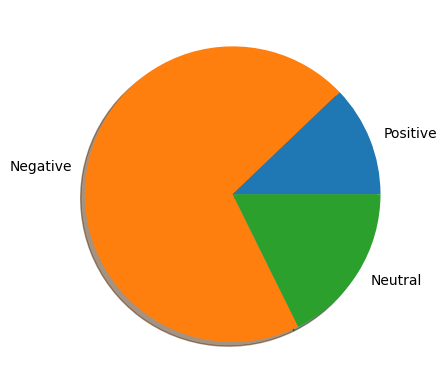

Verb Phrases Reviews
Positive:  484   Negative:  2123   Neutral:  487


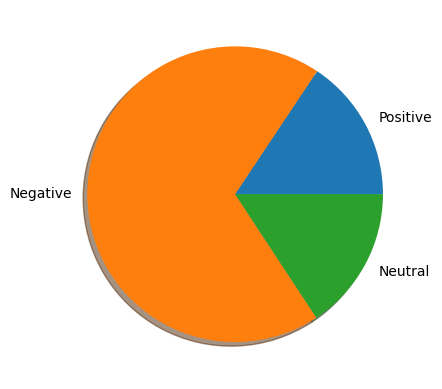

In [12]:
import nltk
import re
from nltk.tokenize import word_tokenize as wt
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from nltk.probability import FreqDist
import pandas as pd

fp1 = open("Noun Phrases for positive Review .txt",'r', encoding="utf-8")
fn1 = open("Noun Phrases for negative Review .txt",'r', encoding="utf-8")
fu1 = open("Noun Phrases for neutral Review .txt",'r', encoding="utf-8")
fp2 = open("Verb Phrases for positive Review .txt",'r', encoding="utf-8")
fn2 = open("Verb Phrases for negative Review .txt",'r', encoding="utf-8")
fu2 = open("Verb Phrases for neutral Review .txt",'r', encoding="utf-8")

contents = fp1.read()
fp1_l = contents.count('\n')
contents = fn1.read()
fn1_l = contents.count('\n')
contents = fu1.read()
fu1_l = contents.count('\n')
contents = fp2.read()
fp2_l = contents.count('\n')
contents = fn2.read()
fn2_l = contents.count('\n')
contents = fu2.read()
fu2_l = contents.count('\n')

y_noun = np.array([fp1_l, fn1_l, fu1_l])
my_noun = ["Positive", "Negative", "Neutral"]
plt.pie(y_noun, labels = my_noun, shadow = True)
print("Noun Phrases Reviews")
print("Positive: ", fp1_l, " ","Negative: ", fn1_l, " ","Neutral: ", fu1_l) 
plt.show()
y_verb = np.array([fp2_l, fn2_l, fu2_l])
my_verb = ["Positive", "Negative", "Neutral"]
plt.pie(y_verb, labels = my_verb, shadow = True)
print("Verb Phrases Reviews")
print("Positive: ", fp2_l, " ","Negative: ", fn2_l, " ","Neutral: ", fu2_l) 
plt.show()